# Libraries required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


# Supervised and Unsupervised Learning Models

Before we cover what neural nets are lets first understand what are supervised and unsupervised learning models are.

Suppose you have input data X and target data Y. The goal of supervised learning models is to approximate a mapping function from input to ouput so that when new data is present one can predict the output for that data. Supervised learning models can be classified into two types:

1. Classification : Target variable is discrete data (categorical). Examples of classification models are Neural Nets, Decision Tree. In these models one can have binary classification or multi class classification.

2. Regression : Target variable is any real value. Examples of regression models are linear and polymonial regression. 

On the other hand in unsupervised learning problems you only have input data X and no corresponding output data. You are training the machine on information that is neither classified nor labelled.
Unsupervised Learning models can be classified into two types:

1. Clustering : Discover inherent groupings within data. Example of a clustering algorithm is k-means

2. Association : Discover rules that describe the data. Examples are Apriori algorithms for association rule learning problems.

In this tutorial we will be taking about how to build a simple neural net model.

In this tutorial we are going to do binary classification and classify the wine as good if it has a quality score above a certain value and if it is below that value then we will classify it as bad wine. Binary classification can be done using logistic regression or shallow neural nets. 

Future works include doing a multi calss classification to determine the quality score of the wine.

# Logistic Regression

Logistic Regression is used for binary classification. However it can be used for multi class classification through the one vs rest scheme in which for each class a binary classification is done. It is a one layer deep neural net having one node which is the output node. The output node assigns weights to each of the inputs and is sent as input into the sigmoid function whose output (which ranges from 0 to 1) is compared with the true label (0 or 1).

# Shallow neural nets

Shallow neural nets consist of 1 or 2 hidden layers. Understanding shallow neural net can help us understand how deep neural nets function. They are better at approximating complex decision boundaries compared to logistic regression where a single node is present and you have only a single decision boundary so if the dataset is not linearly separable, logistic regression does not perform well and has 50/50 percent chance of predicting the correct label. 

# Extracting features from CSV file

In [2]:
file_name = "/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv"

with open(file_name,'r') as csvfile:
    reader = csv.DictReader(csvfile, restkey = None, restval = None, dialect = 'excel')

    # list() takes a single argument. Could be a sequence (string, tuples) or collection (set, dictionary)
    # Reads the entire file into RAM. 
    data = list(reader)

    # Takes a sequence (list,string,tuple) and reorganize the order of the items
    random.shuffle(data)

list_len = len(data)
print('Size of total data : {}'.format(list_len))

Size of total data : 1599


# Data Scaling

Normalization of data is important in binary classification because the ouput node is a sigmoid activation function. In sigmoid activation functions any large negative input results in activity becoming very close to 0. This will hamper values calculated during backpropagation. Scaling down the feature data to lie between 0 and 1 will scale down the inputs into the sigmoid activation function and hence the outputs produced will lie in the range 0 to 1. To see this for yourself comment normalization of feature data and see how the inputs into the sigmoid activation function change and the corresponding outputs.

## Min-Max scaling of data

### $$ z = \dfrac{x - min(x)}{max(x) - min(x)} $$

Here 'x' is input feature and 'z' represents the scaled feature. 

In [3]:
# Feature matrix 
X = np.zeros((list_len,11), dtype = float)
# Quality vector 
Y = np.zeros((list_len,1), dtype = float)

# Transfer data into respective feature vectors
for i in range(0,list_len):
    # data is a list of dictionaries. data[i] is a dictionary. data[i].values provides the values to the corresponding keys. list(data[i].values) converts it into a list
    values = list(data[i].values())

    X[i,0] = values[0]
    X[i,1] = values[1]
    X[i,2] = values[2]
    X[i,3] = values[3]
    X[i,4] = values[4]
    X[i,5] = values[5]
    X[i,6] = values[6]
    X[i,7] = values[7]
    X[i,8] = values[8]
    X[i,9] = values[9]
    X[i,10] = values[10]
    Y[i,0] = values[11]
    
print(X)

print(np.amin(X,axis=0))

print(np.amax(X,axis=0))
    
# Normalizing the data in feature matrix
X = (X - np.amin(X,axis=0))/(np.amax(X,axis=0) - np.amin(X,axis=0))
# X = X/np.amax(X,axis=0)
    
# Arranging data such that each column has one training example.
X = X.T
    
print("Data head :")
print(X)
print("\n")

# If quality score is >= 7 we classify it as good quality wine (1).
# If quality score is < 7 we classify it is as poor quality wine (0).

# MODIFY WHAT IS GOOD QUALITY WINE OVER HERE

Y = np.where(Y >= 7,1,0)
Y = Y.T

print("Quality vector : ")
print(Y)
print("\n")

print("Shape of feature matrix : " + str(X.shape))
print("Shape of quality matrix : " + str(Y.shape))

[[ 8.4    0.635  0.36  ...  3.31   0.57  10.4  ]
 [ 6.6    0.7    0.08  ...  3.44   0.58  10.2  ]
 [ 8.     0.48   0.34  ...  3.28   0.66  12.4  ]
 ...
 [ 7.6    0.35   0.6   ...  3.38   0.79  11.1  ]
 [ 9.5    0.57   0.27  ...  3.27   0.55   9.4  ]
 [ 7.8    0.52   0.25  ...  3.43   0.65   9.   ]]
[4.6     0.12    0.      0.9     0.012   1.      6.      0.99007 2.74
 0.33    8.4    ]
[ 15.9       1.58      1.       15.5       0.611    72.      289.
   1.00369   4.01      2.       14.9    ]
Data head :
[[0.33628319 0.17699115 0.30088496 ... 0.26548673 0.43362832 0.28318584]
 [0.35273973 0.39726027 0.24657534 ... 0.15753425 0.30821918 0.2739726 ]
 [0.36       0.08       0.34       ... 0.6        0.27       0.25      ]
 ...
 [0.4488189  0.5511811  0.42519685 ... 0.50393701 0.41732283 0.54330709]
 [0.14371257 0.1497006  0.19760479 ... 0.2754491  0.13173653 0.19161677]
 [0.30769231 0.27692308 0.61538462 ... 0.41538462 0.15384615 0.09230769]]


Quality vector : 
[[0 0 0 ... 0 0 0]]


Shape 

# Data split into training and testing sets

In [4]:
# Enter train split (1 - 10)
train_split = 7

X_train = X[:,0:train_split*(X.shape[1])//10]
X_test = X[:,train_split*X.shape[1]//10:X.shape[1]]

Y_train = Y[:,0:train_split*(Y.shape[1])//10]
Y_test = Y[:,train_split*(Y.shape[1])//10:Y.shape[1]]

assert((X_train.shape[1] + X_test.shape[1]) == list_len)

X_train_data_len = X_train.shape
print(' X Train data shape : {}'.format(X_train_data_len))
X_test_data_len = X_test.shape
print(' X Test data shape : {}'.format(X_test_data_len))
Y_train_data_len = Y_train.shape
print(' Y Train data shape : {}'.format(Y_train_data_len))
Y_test_data_len = Y_test.shape
print(' Y Test data shape : {}'.format(Y_test_data_len))

 X Train data shape : (11, 1119)
 X Test data shape : (11, 480)
 Y Train data shape : (1, 1119)
 Y Test data shape : (1, 480)


# Maths behind forward propagation and backward propagation

## Weights and biases

Before the data is passed into the activation function it is acted upon by weights and biases. 

### $$ Z = WX + b $$  

Weights and biases are used to segregate the input space. Weights adjust the slope while biases move the slope so that each node/neuron in the hidden layer focuses on one aspect of the input space. 

****

## Loss function

Cross entropy loss or log loss measures the performance of a classification model whose output is  a probability value between 0 and 1. Mean squared loss function is generally used in linear or polynomial regression problems. 

The log loss function for binary and multi class classification is as follows :

### Binary $$ -(ylog(p) + (1-y)log(1-p)) $$

### Multiclass $$ -\sum_{c=1}^{M} y_{c}log(p_{c}) $$

Here c stands for class and y and p are the binary indicators and predicted probability observation. Here we will use binary classification to classify the wines into two categories good quality and bad quality.

****

## Why do you need non linear activation functions ?

Suppose you have a linear activation function in the hidden layer and output layer. The square brackets denote the layer in you are in. 1 for the hidden layer and 2 for output layer.

### $$ Z^{[1]} = W^{[1]}X + b^{[1]} $$
### $$ a^{[1]} = Z^{[1]} $$
### $$ Z^{[2]} = W^{[2]}(W^{[1]}X + b^{[1]}) + b^{[2]} $$
### $$ a^{[2]} = Z^{[2]} = W^{[2]}W^{[1]}X + W^{[2]}b^{[1]} + b^{[2]} = W^{'}X + b^{'} $$

So the output is essentially a linear function of the input and does not create appropriate decision boundaries required for complex data sets. If you have only a sigmoid as the non linear activation function in the ouput then it is again a simple logistic regression problem and there is no need for any hidden leayers.

ReLU is a non linear activation function because it does not have a constant slope. For Z < 0 the slope of the function is 0, at 0 the slope of function is not defined and for Z > 0 the slope of function is 1.

****

## Different types of activation functions

The activation functions can be different for different layers.The below functions are plotted with Z as input and a as output and g(Z) is the mapping function between Z and a.

### $$ Z = w^{T}X + b $$
### $$ a = g(Z) $$

### SIGMOID FUNCTION

### $$ a = \dfrac{1}{1 + e^{-Z}} $$

* The Sigmoid function is not centered about 0.
* For large value or small value of Z the slope of the function is 0 and hence the rate of learning decreases.
* Use sigmoid in the output layer when you are doing binary classification as sigmoid outputs lie between 0 and 1 but dont use for hidden layers.
* Derivative of sigmoid function is :

### $$ \dfrac{da}{dZ} = \dfrac{e^{Z}}{(1 + e^{-Z})^2} = \dfrac{1 +e^{-Z}}{(1 + e^{-Z})^2} - \dfrac{1}{(1 + e^{-Z})^2} = a - a^2 = a(1-a) $$


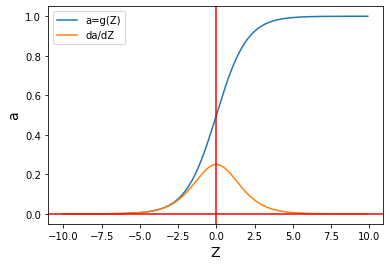

In [5]:
Z = np.arange(-10,10,0.1)
plt.plot(Z,1/(1 + np.exp(-Z)),Z,(1/(1 + np.exp(-Z)))*(1 - 1/(1 + np.exp(-Z))))
plt.axvline(x=0,color='r')
plt.axhline(y=0,color='r')
plt.ylabel('a',fontsize=14)
plt.xlabel('Z',fontsize=14)
plt.legend(('a=g(Z)','da/dZ'))
plt.show()

### HYPERBOLIC TAN FUNCTION

### $$ a = tanh(Z) = \dfrac{e^{Z} - e^{-Z}}{e^{Z} + e^{-Z}} $$

* The tanh function is centered about 0 and has a steeper slope.
* For large value or small value of Z the slope of the function is 0 and hence the rate of learning decreases. 
* It is generally used in the hidden layers as it values lie between -1 to 1 hence the mean for the  hidden layer comes out to be 0 or very close to 0 and hence which helps in centering the data making the learning easier for the next layer.
* Derivative of tanh function is :

### $$ \dfrac{da}{dZ} = \dfrac{(e^{Z} + e^{-Z})^2 - (e^{Z} - e^{-Z})^2}{(e^{Z} + e^{-Z})^2} = 1 - a^2 $$

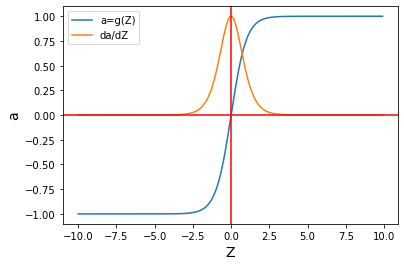

In [6]:
Z = np.arange(-10,10,0.1)
plt.plot(Z,(np.exp(Z) - np.exp(-Z))/(np.exp(Z) + np.exp(-Z)),Z,1 - ((np.exp(Z) - np.exp(-Z))/(np.exp(Z) + np.exp(-Z)))**2)
plt.axvline(x=0,color='r')
plt.axhline(y=0,color='r')
plt.ylabel('a',fontsize=14)
plt.xlabel('Z',fontsize=14)
plt.legend(('a=g(Z)','da/dZ'))
plt.show()

### RECTIFIED LINEAR UNITS AND LEAKY RECTIFIED LINEAR UNITS

### $$ a = max(0,Z) $$ 

* It is a peice wise function where for Z <= 0 then a = 0 and for Z > 0 then a = Z. It ranges from 0 to $ \infty $
* ReLU is less computationally expensive than tanh and sigmoid beacause it involves simpler mathematical operations. It avoids and rectifies the vanishing gradient problem.
* Its limitation is that it should be used only within hidden layers of a neural network model. The default activation function for hidden layers is ReLU.
* It avoids and rectifies the vanishing gradient problem. 

The vanishing gradient problem is encountered when training neural nets with gradient based learning methods and backpropagation. In such methods, each of the neural network's weights recieve an update proportional to the partial derivative of the error function with respective to the current weight in each iteration of training Wi = Wi + learning_rate*(dJ/dWi). The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the network from further training. For example, activation functions like tanh have gradients in the range from 0 to 1 and backpropagation computes gradients by the chain rule. This has the effect of multiplying 'n' of these small numbers to compute gradients of the "front layers" in an n-layer netowork, meaning the gradient decreses exponentially with n while the front layers train very slowly.

* A problem with ReLU is that half of the space of Z is less than 0 and this can result in dead neurons with no weight update hence to overcome this problem leaky ReLU is used. In most cases most of the hidden units will have Z greater than 0.

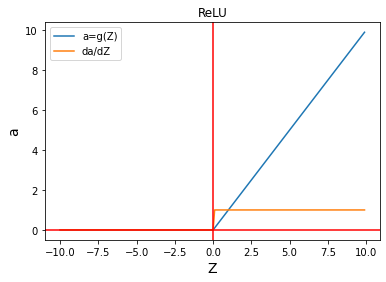

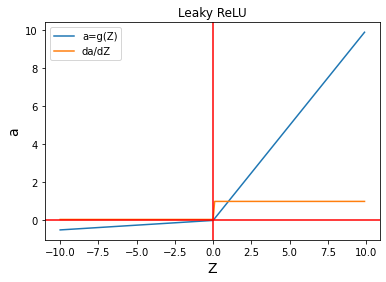

In [7]:
Z = np.arange(-10,10,0.1)
relu = np.where(Z<=0,0,Z)
relu_der = np.where(Z<=0,0,1)
leaky_relu = np.where(Z<=0,0.05*Z,Z)
leaky_relu_der = np.where(Z<=0,0.05,1)

plt.plot(Z,relu,Z,relu_der)
plt.title('ReLU')
plt.axvline(x=0,color='r')
plt.axhline(y=0,color='r')
plt.ylabel('a',fontsize=14)
plt.xlabel('Z',fontsize=14)
plt.legend(('a=g(Z)','da/dZ'))
plt.show()
            
plt.plot(Z,leaky_relu,Z,leaky_relu_der)
plt.title('Leaky ReLU')
plt.axvline(x=0,color='r')
plt.axhline(y=0,color='r')
plt.ylabel('a',fontsize=14)
plt.xlabel('Z',fontsize=14)
plt.legend(('a=g(Z)','da/dZ'))
plt.show()
        

## Computing gradients in a three layer Neural Net and generalizing to n layer Neural Net

### NOTATION

1. X is the input and is also represented as activation in zeroth layer $ a$
2. "Z" is a linear function operating on the input data whose output is input into a non linear function called the activation function denoted by "a". Different types include tanh, sigmoid and relu. 
3. $ \sigma(Z) $ is sigmoid activation function for output layer. Sigmoid is used beacause we are doing binary classification.
4. $ W_{3}^{[3](i)} $ the number at the top in the square brackets denote the weights in third layer and the number in the round brackets denotes the ith training example. The number at the bottom tells us which node the weights correspond to.
5. * represents element wise multiplication.

### FORWARD PROPAGATION

#### Layer 1 Linear function 
### $$ Z^{[1]} = W^{[1]}X + b^{[1]} $$
#### Layer 1 Activation function
### $$ a^{[1]} = g(Z^{[1]}) $$
#### Layer 2 Linear function
### $$ Z^{[2]} = W^{[2]}a^{[1]} + b^{[2]} $$
#### Layer 2 Activation function 
### $$ a^{[2]} = g(Z^{[2]}) $$
#### Layer 3 Linear function
### $$ Z^{[3]} = W^{[3]}a^{[2]} + b^{[3]} $$
#### Layer 3 Activation function
### $$ a^{[3]} = \sigma(Z^{[3]}) $$
#### Layer 'l' Linear function
### $$ Z^{[l]} = W^{[l]}a^{[l-1]} + b^{[l]} $$
#### LAYER 'l' Activation function
### $$ a^{[l]} = \sigma(Z^{[l]}) $$

#### Log Loss / Cross Entropy function 
### $$ L(a^{[n]},y) = -\dfrac{1}{m} \sum_{i=1}^{m}[y^{(i)}log(a^{[n](i)}) + (1 - y^{(i)})log(1 - a^{[n](i)})] $$

The loss is computed for each sum and is then summed across all training examples and finally divided by number of training examples.

### BACKWARD PROPAGATION

#### Layer 3 Backpropagation
### $$ \dfrac{dL}{da^{[3]}} = \dfrac{-y}{a^{[3]}} + \dfrac{(1-y)}{(1-a^{[3]})} = \dfrac{-1}{m}\dfrac{a^{[3]} - y}{a^{[3]}(1 - a^{[3]})} $$
### $$ \dfrac{dL}{dW^{[3]}} = \dfrac{dL}{da^{[3]}}\dfrac{da^{[3]}}{dZ^{[3]}}\dfrac{dZ^{[3]}}{dW^{[3]}} = (\dfrac{dL}{da^{[3]}}*g^{'}(Z^{[3]}))a^{[2]T} $$
### $$ \dfrac{dL}{db^{[3]}} = \dfrac{dL}{da^{[3]}}\dfrac{da^{[3]}}{dZ^{[3]}}\dfrac{dZ^{[3]}}{db^{[3]}} = \dfrac{dL}{da^{[3]}}*g^{'}(Z^{[3]}) $$

#### Layer 2 Backpropagation
### $$ \dfrac{dL}{da^{[2]}} = \dfrac{dL}{da^{[3]}}\dfrac{da^{[3]}}{dZ^{[3]}}\dfrac{dZ^{[3]}}{da^{[2]}} = W^{[3]T}(\dfrac{dL}{da^{[3]}}*g^{'}(Z^{[3]})) $$
### $$ \dfrac{dL}{dW^{[2]}} = \dfrac{dL}{da^{[2]}}\dfrac{da^{[2]}}{dZ^{[2]}}\dfrac{dZ^{[2]}}{dW^{[2]}} = (\dfrac{dL}{da^{[2]}}*g^{'}(Z^{[2]}))a^{[1]T} $$
### $$ \dfrac{dL}{db^{[2]}} = \dfrac{dL}{da^{[2]}}\dfrac{da^{[2]}}{dZ^{[2]}}\dfrac{dZ^{[2]}}{db^{[2]}} = \dfrac{dL}{da^{[2]}}*g^{'}(Z^{[2]}) $$

#### Layer 1 Backpropagation
### $$ \dfrac{dL}{da^{[1]}} = \dfrac{dL}{da^{[2]}}\dfrac{da^{[2]}}{dZ^{[2]}}\dfrac{dZ^{[2]}}{da^{[1]}} = W^{[2]T}(\dfrac{dL}{da^{[2]}}*g^{'}(Z^{[2]})) $$
### $$ \dfrac{dL}{dW^{[1]}} = \dfrac{dL}{da^{[1]}}\dfrac{da^{[1]}}{dZ^{[1]}}\dfrac{dZ^{[1]}}{dW^{[1]}} = (\dfrac{dL}{da^{[1]}}*g^{'}(Z^{[1]}))a^{[0]T} $$
### $$ \dfrac{dL}{db^{[1]}} = \dfrac{dL}{da^{[1]}}\dfrac{da^{[1]}}{dZ^{[1]}}\dfrac{dZ^{[1]}}{db^{[1]}} = \dfrac{dL}{da^{[1]}}*g^{'}(Z^{[1]}) $$

#### Layer 'l' Backpropagation
### $$ \dfrac{dL}{da^{[l]}} = W^{[l+1]T}(\dfrac{dL}{da^{[l+1]}}*g^{'}(Z^{[l+1]}))$$
### $$ \dfrac{dL}{dW^{[l]}} = (\dfrac{dL}{da^{[l]}}*g^{'}(Z^{[l]}))a^{[l-1]T} $$
### $$ \dfrac{dL}{db^{[l]}} = \dfrac{dL}{da^{[l]}}*g^{'}(Z^{[l]}) $$

*** 

### MATRIX DIMENSIONS

Let $n_x$, $n_{h1}$, $n_{h2}$, $n_y$ denote the number of nodes in input, hidden layer 1, hidden layer 2 and output layer. Let 'm' be the number of training examples. 

Lets see the dimensions of the weight, biases and activation matrices.

* X has dimensions [$n_x$, m] 

* Y has dimensions [$n_y$, m] 

* $ W^{[1]} $ has dimensions [$n_{h1}$, $n_x$]

* $ b^{[1]} $ has dimensions [$n_{h1}$, 1]. 

* $ a^{[1]} $ has dimensions [$n_{h1}$, m]. 

* $ W^{[2]} $ has dimensions [$n_{h2}$, $n_{h1}$]

* $ b^{[2]} $ has dimensions [$n_{h2}$, 1].

* $ a^{[2]} $ has dimensions [$n_{h2}$, m].

* $ W^{[3]} $ has dimensions [$n_y$, $n_{h2}$]

* $ b^{[3]} $ has dimensions [$n_y$, 1]

* $ a^{[3]} $ has dimensions [$n_y$, m].

* **The weight matrix in the lth layer has dimensions as follows [number of hidden units in lth layer, number of hidden units in (l-1)th layer]. The bias vector in the lth layer has the dimensions as follows [number of hidden units in lth layer, 1]. The bias vector is broadcasted so that it can be added to WX when calculating Z.** 

Lets see the dimensions of the derivatives

* The dimensions of any Loss derivative with respect to activation must have the same dimensions of the activation marix in the corresponding layer. So for example $ \dfrac{dL}{da^{[3]}} $, $ \dfrac{dL}{da^{[2]}} $, $ \dfrac{dL}{da^{[1]}} $ have dimensions [$n_y$, m], [$n_{h2}$, m], [$n_{h1}$, m] respectively. Let us prove this for $ \dfrac{dL}{da^{[2]}} $. Looking at its formula we see that $ W^{[3]T} $ has dimensions [$n_{h2}$, $n_y$] while $ \dfrac{dL}{da^{[3]}} $ has dimensions of [$n_y$, m] and $ g^{'}(Z^{[3]}) $ has dimensions [$n_y$, m]. $ \dfrac{dL}{da^{[3]}} $ and $ g^{'}(Z^{[3]}) $ are multiplied element wise and the output undergoes dot product multiplication with $ W^{[3]T} $.

* The dimensions of any Loss derivative with respect to weights must have the same dimensions of the weights matrix in the corresponding layer. So for example $ \dfrac{dL}{dW^{[3]}} $, $ \dfrac{dL}{dW^{[2]}} $, $ \dfrac{dL}{dW^{[1]}} $ have dimensions [$n_y$, $n_{h2}$], [$n_{h2}$, $n_{h1}$], [$n_h1$, $n_x$] respectively. Let us prove this for $ \dfrac{dL}{dW^{[2]}} $. Looking at its formula we see that $ \dfrac{dL}{da^{[2]}} $ has dimensions [$n_{h2}$, m] and $ g^{'}(Z^{[2]} $ has dimensions [$n_{h2}$, m] and $ a^{[1]T} $ has dimensions [m, $n_{h1}$]. $ \dfrac{dL}{da^{[2]}} $ and $ g^{'}(Z^{[2]} $ is multiplied element wise and the output undergoes dot product multiplication with $ a^{[1]T} $.

* The dimensions of any Loss derivative with respect to bias must have the same dimensions as that of the bias vector in the corresponding layer. So for example $ \dfrac{dL}{db^{[3]}} $, $ \dfrac{dL}{db^{[2]}} $, $ \dfrac{dL}{db^{[1]}} $ have dimensions [$n_y$, 1], [$n_{h2}$, 1], [$n_h1$, 1] respectively. Let us prove this for $ \dfrac{dL}{db^{[2]}} $. Looking at its formula formula we see that $ \dfrac{dL}{da^{[2]}} $ has dimensions [$n_{h2}$, m] and $ g^{'}(Z^{[2]} $ has dimensions [$n_{h2}$, m]. We use np.sum() function and sum it across all columns so that we get a column vector.

Consider an 'n' layered neural net. When computing derivative of Loss with respect to weight $ W^{[n]} $ then you take the derivative of the activation function and multiply by input to activation whereas while taking derivative of Loss with respect to $  W^{[1]} $ then there is a compounding effect. That is why changes in weights to first layer is the slowest if sigmoid or tanh activation function is used in hidden layer giving rise to the vanishing gradient problem.

****

## Random initialization of weights

When having multi layer neural net intializing all weights to 0 does not work. This can be understood by the following example. Consider a neural net with two inputs and two hidden nodes and one output. Node 1 In hidden layer has weights $ W_1^{[1]} $ [0,0] and node two in hidden layer has weights $ W_2^{[1]} $ [0,0] and b is initialized to 0 for both of them. Output node has weight $ W_1^{[2]} $ [0,0] and b is intialized to 0. The weights for the activation for node 1 is $a_1^{[1]}$ and is given by $ g(W_1^{[1]}X + b_1^{[1]}) $ similarly for $a_2^{[1]}$ it is $ g(W_2^{[1]}X + b_2^{[1]}) $. Substituting the zero weights in the activation functions we get $a_1^{[1]}$ == $a_2^{[1]}$ and $a^{[1]} = [0;0] $. From the above formula of $ \dfrac{dL}{dW^{[1]}} $ we can see that weights in $ W^{[1]} $ will be updated the same $ W^{[1]} = W^{[1]} - \alpha\dfrac{dL}{dW^{[1]}} $ as they both started from same value.  Hence the two hidden units will behave as 1 hidden unit. As iterations continue both the weights of the hidden units will be updated the same. 

This is solved by using $W^{[1]}$ = np.random.randn()x0.01. We multiply with 0.01 or any other small constant when using sigmoid or tanh activation function as we want the value of Z input into the activation function to be small otherwise large inputs lead to gradients close to 0 and the optimization algorithm will become slow leading to problem of vanishing gradient. However if you are not using sigmoid or tanh activation functions this is not a problem. Also if we have many deep layers the constant you choose will vary but for shallow neural nets (2 layers deep) using 0.01 is fine.

However if Logistic Regression (no hidden layer) then can intialize all weights to 0. The first example X fed in the logistic regression will output zero but the derivatives of the Logistic Regression depend on the input X (because there's no hidden layer) which is not zero. So at the second iteration, the weights values follow X's distribution and are different from each other if X is not a constant vector. 

# The Neural Network architecture

In [8]:
# Computes sigmoid activation.
def sigmoid(Z):
    
    A = 1/(1 + np.exp(-Z))
    
    return A

def sigmoid_der(A):
    
    dAdZ = A*(1-A)
    
    return dAdZ

def relu(Z):
    
    A = np.maximum(0,Z)
    
    return A

def relu_der(A):
    
    dAdZ = np.where(A>0,1,0)
    
    return dAdZ

def initialize_parameters(dims):
    
    n = len(dims)
    params = {}
    
    for l in range(1,n):
        params["W"+str(l)] = np.random.randn(dims[l],dims[l-1])*0.1
        params["b"+str(l)] = np.zeros((dims[l],1),dtype=float)
        
    return params

# Forward propagation function
# caches architecture : [A_prev[l-1],W[l],b[l],A[l]]
def forward_propagation(params,A):
    
    # Number of layers
    L = len(params) // 2
    caches = []
    
    for l in range(1,L):
        # 1st hidden layer to L-1th hidden layer is relu
        A_prev = A
        Z = np.dot(params["W"+str(l)],A_prev) + params["b"+str(l)]
        linear_cache = (A_prev,params["W"+str(l)],params["b"+str(l)])
        A = relu(Z)
        cache = (linear_cache,A)
        caches.append(cache)
        
    # Final output layer is sigmoid layer 
    A_prev = A
    Z = np.dot(params["W"+str(L)],A_prev) + params["b"+str(L)]
    linear_cache = (A_prev,params["W"+str(L)],params["b"+str(L)])
#     print("Input into sigmoid function : ")
#     print("\n")
#     print(Z)
    AL = sigmoid(Z)
#     print("\n")
#     print("Output from sigmoid function : ")
#     print("\n")
#     print(AL)
#     print("\n")
    cache = (linear_cache,AL)
    caches.append(cache)
        
    return AL, caches

# Cost function - Cross Entropy Loss Function
def compute_cost(AL,Y):
    
    # Number of training examples
    m = Y.shape[1]
    
    cost = -np.sum(np.multiply(Y,np.log(AL)) + np.multiply(1-Y,np.log(1-AL)), axis=1, keepdims=True)/m
    
    cost = np.squeeze(cost)
    
    return cost

# Backward propogation function 
def backward_propagation(AL,Y,caches):
    
    grads = {}
    
    # Number of layers
    L = len(caches)
    
    # Number of training examples
    m = Y.shape[1]
    
    # Derivative of Loss with respect to Activation of last layer
    dAL = -(np.divide(Y,AL) - np.divide(1-Y,1-AL))/m
    # Calculating the derivatives of Loss with respect to weights and biases of last layer.
    last_cache = caches[L-1]
    # Extracting the linear cache and Activation in the last layer
    linear_cache, A = last_cache
    # Linear cache has the following components : A_prev, Weights and biases in last layer
    A_prev, W ,b = linear_cache
    grads["dA"+str(L)] = dAL
    grads["dW"+str(L)] = np.dot(np.multiply(grads["dA"+str(L)],sigmoid_der(A)),A_prev.T)
    grads["db"+str(L)] = np.sum(np.multiply(grads["dA"+str(L)],sigmoid_der(A)),axis=1,keepdims=True)
    
    for l in range(L-1,0,-1):
        if l == L-1:
            grads["dA"+str(l)] = np.dot(W.T,np.multiply(grads["dA"+str(l+1)],sigmoid_der(A)))
        else:
            grads["dA"+str(l)] = np.dot(W.T,np.multiply(grads["dA"+str(l+1)],relu_der(A)))           
        current_cache = caches[l-1]
        linear_cache, A = current_cache
        A_prev, W, b = linear_cache
        grads["dW"+str(l)] = np.dot(grads["dA"+str(l)]*relu_der(A),A_prev.T)
        grads["db"+str(l)] = np.sum(grads["dA"+str(l)]*relu_der(A),axis=1,keepdims=True)
        
    return grads

# Updating the weights and biases 
def update_parameters(params, grads, learning_rate):
    
    # Number of layers in model
    L = len(params) // 2
    
    for l in range(1,L):
        params["W"+str(l)] = params["W"+str(l)] - learning_rate*grads["dW"+str(l)]
        params["b"+str(l)] = params["b"+str(l)] - learning_rate*grads["db"+str(l)]
        
    return params

# Predicting the 
def predict(params,X):
    
    AL,cache = forward_propagation(params,X)
    predictions = np.where(AL>0.5,1,0)

Using all the above functions in the model function which the user will invoke

In [9]:
def model(X,Y,dims,learning_rate,num_iterations,print_cost=True):
    
    costs = []
    
    # Takes input only dimensions of each layer
    params = initialize_parameters(dims)
    
    for i in range(0, num_iterations):
        
        # Forward propogation; inputs : parameters, X ; outputs : last layer activation, cache
        AL, caches = forward_propagation(params,X)
        
        # Computing cost; inputs : AL, Y; outputs : cost
        cost = compute_cost(AL,Y)
        
        # Backward propogation; inputs : AL, Y, cache ; outputs : grads
        grads = backward_propagation(AL,Y,caches)
        
        # Update parameter; inputs : parameters, gradients; outputs : updated parameters
        params = update_parameters(params,grads,learning_rate)
        
        if print_cost and i%100 == 0:
            print("Cost after iteration %i: %f" %(i,cost))
            costs.append(cost)
    
    # Plotting the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('number of iterations')
    plt.title('Learning rate : '+ str(learning_rate))
    plt.show()
    
    return params
    

# Run model function here

Cost after iteration 0: 0.690046
Cost after iteration 100: 0.385876
Cost after iteration 200: 0.368758
Cost after iteration 300: 0.344993
Cost after iteration 400: 0.319835
Cost after iteration 500: 0.302688
Cost after iteration 600: 0.293960
Cost after iteration 700: 0.289094
Cost after iteration 800: 0.286013
Cost after iteration 900: 0.283946
Cost after iteration 1000: 0.282379
Cost after iteration 1100: 0.281059
Cost after iteration 1200: 0.279890
Cost after iteration 1300: 0.278908
Cost after iteration 1400: 0.278088
Cost after iteration 1500: 0.277414
Cost after iteration 1600: 0.276852
Cost after iteration 1700: 0.276385
Cost after iteration 1800: 0.275990
Cost after iteration 1900: 0.275647
Cost after iteration 2000: 0.275346
Cost after iteration 2100: 0.275103
Cost after iteration 2200: 0.274890
Cost after iteration 2300: 0.274691
Cost after iteration 2400: 0.274503
Cost after iteration 2500: 0.274330
Cost after iteration 2600: 0.274171
Cost after iteration 2700: 0.274018
Cost

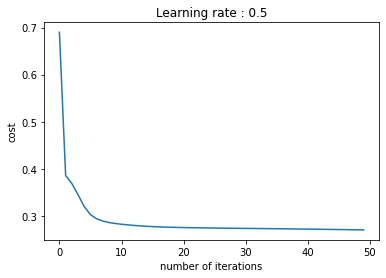

In [10]:
# You can play around with the learning rate and number of iterations and then press run all
dims = [11,11,11,1]
params = model(X_train,Y_train,dims,learning_rate=0.5,num_iterations=5000,print_cost=True)

# Input your own parameters and check if wine is good quality or not

In [11]:
# Enter the following values

# Fixed acidity range (4.6 - 15.9) ; max = 15.9
FA = 10
# Volatile acidity range (0.12 - 1.58) ; max = 1.58
VA = 0.5
# Citric acid range (0 - 1) ; max = 1
CA = 0.8
# Residual sugars (0.9 - 15.5) ; max = 15.5
RS = 10
# Chlorides (0.01 - 0.61) ;  max = 0.61
C = 0.03
# Free sulphur dioxide (1 - 72) ; max = 72
FS = 30
# Total sulphure dioxide (6 - 289) ; max = 289
TS = 50
# Density (0.99 - 1) ; max = 1
D = 0.9997
# pH (2.74 - 4.01) ; max = 4.01
PH = 3.5
# Sulphates (0.33 - 2) ; max = 2
S = 1.5
# alcohol (8.4 - 14.9) ; max = 14.9
A = 12

user_X = np.zeros((11,1), dtype = float)
user_X[0] = FA/15.9
user_X[1] = VA/1.58
user_X[2] = CA/1
user_X[3] = RS/15.5
user_X[4] = C/0.61
user_X[5] = FS/72
user_X[6] = TS/289
user_X[7] = D/1
user_X[8] = PH/4.01
user_X[9] = S/2
user_X[10] = A/14.9
    


# Parameters vs Hyper parameters

Applied deep learning is a very empirical process.

Parameters are weights and biases

Exmaples of hyperparameters are :

1. Learning rate $ \alpha $
2. number of iterations
3. number of hidden layers
4. number of hidden units
5. choice of activation function

Feel free to refer to these amazing links which I have referred to build this model.

1. Andrew NG Coursera : Neural Network and Deep Learning
2. https://github.com/stephencwelch/Neural-Networks-Demystified/blob/master/Part%201%20Data%20and%20Architecture.ipynb
3. http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/